#Analiza Predykcji Wysokości Dziecka na Podstawie Cech Rodzinnych: Porównanie Skuteczności Modeli Regresyjnych

**Autorzy**: Katarzyna Zyśko i Zuzanna Winiarska

**Baza danych**: GaltonFamilies

**Rok akademicki**: 2024/2025

## Opis struktury raportu

1. **Wstęp**
   - Krótkie wprowadzenie do analizy, cel i znaczenie zbioru danych.

2. **Opis zbioru danych**
   - Szczegółowy opis danych, ich źródła, cech i charakterystyki.

3. **Cel analizy**
   - Określenie celu badania oraz hipotez roboczych.

4. **Statystyki opisowe**
   - Prezentacja statystyk opisowych dla 5 wybranych cech.

5. **Wykresy dla wybranych zmiennych**
   - Wizualizacja danych dla kluczowych cech.

6. **Przygotowanie danych**
   - Analiza typu danych, wykrywanie brakujących wartości, detekcja i obsługa outlierów.

7. **Wstępne uczenie modeli**
   - Wstępne uczenie modeli dla ustalenia początkowego poziomu skuteczności.

8. **Optymalizacja i czyszczenie danych**
   - Usuwanie kolumn o małej wariancji, wyznaczenie korelacji pomiędzy cechami i usuwanie cech o wysokiej korelacji, a także obsługa outlierów.

9. **Zaawansowane uczenie modeli**
   - Uczenie modeli po rozszerzeniu zbioru danych, wskazanie najistotniejszych cech oraz ocena skuteczności.

10. **Redukcja wymiarów**
    - Przeprowadzenie analizy PCA i ICA w celu redukcji wymiarów i analizy wyników.

11. **Podsumowanie analizy**
    - Omówienie wyników, wniosków oraz propozycje dalszych kroków w badaniach.

# 1. Wstęp

Raport przedstawia analizę zbioru danych GaltonFamilies, który zawiera informacje o wzroście rodziców oraz ich dzieci. Celem analizy jest zrozumienie zależności między tymi zmiennymi oraz próba przewidywania wzrostu dzieci na podstawie danych o rodzicach. W raporcie uwzględniono zarówno statystyki opisowe, jak i wizualizacje, a także zastosowano techniki przetwarzania danych oraz modelowania, które pozwoliły na ocenę jakości predykcji.

# 2. Opis zbioru danych

Zbiór danych opracowany przez Francisa Galtona zawiera 1886 obserwacji dotyczących 934 dzieci pochodzących z 205 rodzin. Badanie to jest jednym z pionierskich przykładów analizy dziedziczności cech fizycznych w populacji.

- **Cel badania:**  
  1. Zbadanie relacji między wzrostem rodziców a wzrostem ich dzieci, w celu określenia, czy cechy fizyczne, takie jak wzrost, są dziedziczone.  
  2. Analiza wyboru małżeńskiego, aby sprawdzić, czy istnieje związek między wzrostem męża a wzrostem żony.  

- **Charakterystyka danych:**  
  - Zbiór danych zawiera pomiary wzrostu ojców, matek i ich dzieci.  
  - Dane obejmują zarówno chłopców, jak i dziewczynki.  
  - Wykorzystywana miara wzrostu to cale (inches).  

- **Struktura:**  
  - Łączna liczba obserwacji: 1886 (pojedyncze pomiary dzieci).  
  - Liczba dzieci: 934 (niektóre dzieci mają wielokrotne obserwacje).  
  - Liczba rodzin: 205 (dane dla rodzin uwzględniają wzrost ojca i matki).  

### Opis cech występujących w zbiorze

- **father** - reprezentuje wzrost ojca w calach. Wartość ta jest kluczowa w analizie wpływu cech genetycznych na wzrost dzieci.

- **mother** - reprezentuje wzrost matki w calach. Razem z cechą *father* pozwala oszacować wpływ obu rodziców na wzrost dzieci.

- **midparentHeight** - znormalizowana średnia wzrostu rodziców, uwzględniająca różnice płciowe, obliczana jako $\frac{(father + 1.08 \cdot mother)}{2}$.
Jest to zmienna pochodna, często wykorzystywana jako predyktor wzrostu dzieci.

- **children** - liczba dzieci w rodzinie. Informacja ta pozwala badać różnorodność wzrostu wśród rodzeństwa oraz potencjalne zależności między liczbą dzieci a ich wzrostem.

- **childHeight** - wzrost dziecka w calach. Jest to zmienna objaśniana, której wartości staramy się przewidzieć na podstawie innych cech w zbiorze danych.



## 3. Cel analizy

Analiza zmierza do zbudowania modeli statystycznych i uczenia maszynowego, które umożliwią przewidywanie wzrostu dzieci na podstawie dostępnych cech, takich jak wzrost ojca, matki oraz liczba dzieci w rodzinie. Modele te mają na celu:  

- **Dokładność predykcji**: Zapewnienie, że przewidywany wzrost dzieci jak najwierniej odzwierciedla rzeczywiste wartości obserwowane w danych.  
- **Ocena różnorodnych metod**: Porównanie skuteczności różnych algorytmów, takich jak regresja liniowa czy lasy losowe, pod kątem ich zdolności do modelowania złożonych zależności w danych.  
- **Identyfikacja wzorców i zależności**: Wydobycie istotnych zależności między cechami (np. średnim wzrostem rodziców) a wzrostem dzieci, co pomaga w lepszym zrozumieniu mechanizmów dziedziczenia wzrostu.  
- **Weryfikacja modelu**: Sprawdzenie jakości wyników poprzez metryki, takie jak $R^2$, RMSE czy znaczenie cech w modelach.

# 4. Statystyki opisowe dla 5 wybranych cech

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import io
import requests

# Pobranie danych
url = 'https://raw.githubusercontent.com/zw2613/GaltonFamilies/main/GaltonFamilies.csv'
response = requests.get(url)
response.raise_for_status()
data = pd.read_csv(io.StringIO(response.text))

# Wybór kolumn do analizy
selected_columns = ['father', 'mother', 'midparentHeight', 'children', 'childHeight']
selected_data = data[selected_columns]

# Obliczenie statystyk opisowych
desc_stats = selected_data.describe().round(3)

# Wyświetlenie statystyk opisowych w formie tabeli
print("Statystyki opisowe dla wybranych kolumn:")
print(tabulate(desc_stats, headers='keys', tablefmt='grid'))

Statystyki opisowe dla wybranych kolumn:
+-------+----------+----------+-------------------+------------+---------------+
|       |   father |   mother |   midparentHeight |   children |   childHeight |
+=======+==========+==========+===================+============+===============+
| count |  934     |  934     |           934     |    934     |       934     |
+-------+----------+----------+-------------------+------------+---------------+
| mean  |   69.197 |   64.089 |            69.207 |      6.171 |        66.746 |
+-------+----------+----------+-------------------+------------+---------------+
| std   |    2.476 |    2.291 |             1.802 |      2.729 |         3.579 |
+-------+----------+----------+-------------------+------------+---------------+
| min   |   62     |   58     |            64.4   |      1     |        56     |
+-------+----------+----------+-------------------+------------+---------------+
| 25%   |   68     |   63     |            68.14  |      4     |    

#### Wnioski ze statystyk opisowych:

1. **Wysokość ojca (`father`)**:
   - **Średnia wysokość ojca** wynosi 69.197 cali, co jest zbliżone do mediany (69.00), co sugeruje symetryczny rozkład.
   - Rozrzut danych (odchylenie standardowe) wynosi 2.476 cala. Najniższy wzrost to **62.00**, a najwyższy **78.50**, co wskazuje na kilka potencjalnych wartości odstających w górnym zakresie.

2. **Wysokość matki (`mother`)**:
   - **Średnia wysokość matki** to 64.089 cala, także zbliżona do mediany (64.00), co wskazuje na brak znacznej asymetrii w danych.
   - Rozkład jest nieco bardziej skupiony niż w przypadku ojców – odchylenie standardowe wynosi 2.291 cala. Wysokości wahają się od **58.00** do **70.50** cala.

3. **Wysokość środkowa rodzica (`midparentHeight`)**:
   - Średnia wartość (69.207 cala) oraz mediana (69.248 cala) są niemal identyczne, co sugeruje bardzo symetryczny rozkład.
   - Odchylenie standardowe wynosi 1.802 cala – wartości są bardziej skoncentrowane niż w przypadku wzrostów ojców i matek.
   - Rozkład jest węższy, z minimalną wartością **64.40** i maksymalną **75.43** cala.

4. **Liczba dzieci w rodzinie (`children`)**:
   - Średnia liczba dzieci to 6.171, ale odchylenie standardowe wynosi 2.729 – to duża zmienność.
   - Mediana wynosi 6 dzieci, ale wartość maksymalna to aż **15 dzieci**, co sugeruje, że duże rodziny są rzadkie, ale obecne.
   - Rozkład liczby dzieci jest wyraźnie prawostronnie skośny – większe rodziny są mniej powszechne.

5. **Wysokość dzieci (`childHeight`)**:
   - Średnia wysokość dzieci wynosi 66.746 cala, co jest bardzo bliskie mediany (66.500 cala), sugerując symetrię w rozkładzie.
   - Odchylenie standardowe to 3.579 cala, z minimalną wysokością **56.00** i maksymalną **79.00** cala.

---

### Kluczowe obserwacje:
1. **Symetria rozkładów**: Większość zmiennych, takich jak wysokości (ojca, matki, środkowa rodzica, dzieci), ma symetryczny rozkład, co sugeruje brak silnych odchyleń.
2. **Wartości odstające**: Wzrosty ojców, dzieci, a także liczba dzieci mogą mieć wartości odstające na wyższych poziomach.
3. **Średni wzrost rodzica (`midparentHeight`)**: Jest to zmienna najbardziej stabilna, z najmniejszym odchyleniem standardowym (1.802 cala).
4. **Liczba dzieci**: Rozkład jest bardzo zróżnicowany, a duże rodziny znacząco wpływają na średnią wartość.

## 5. Wykresy dla wybranych zmiennych
   - Wizualizacja danych dla kluczowych cech.

**a) Histogram, wykres pudełkowy i wykres rozrzutu dla zmiennej father**

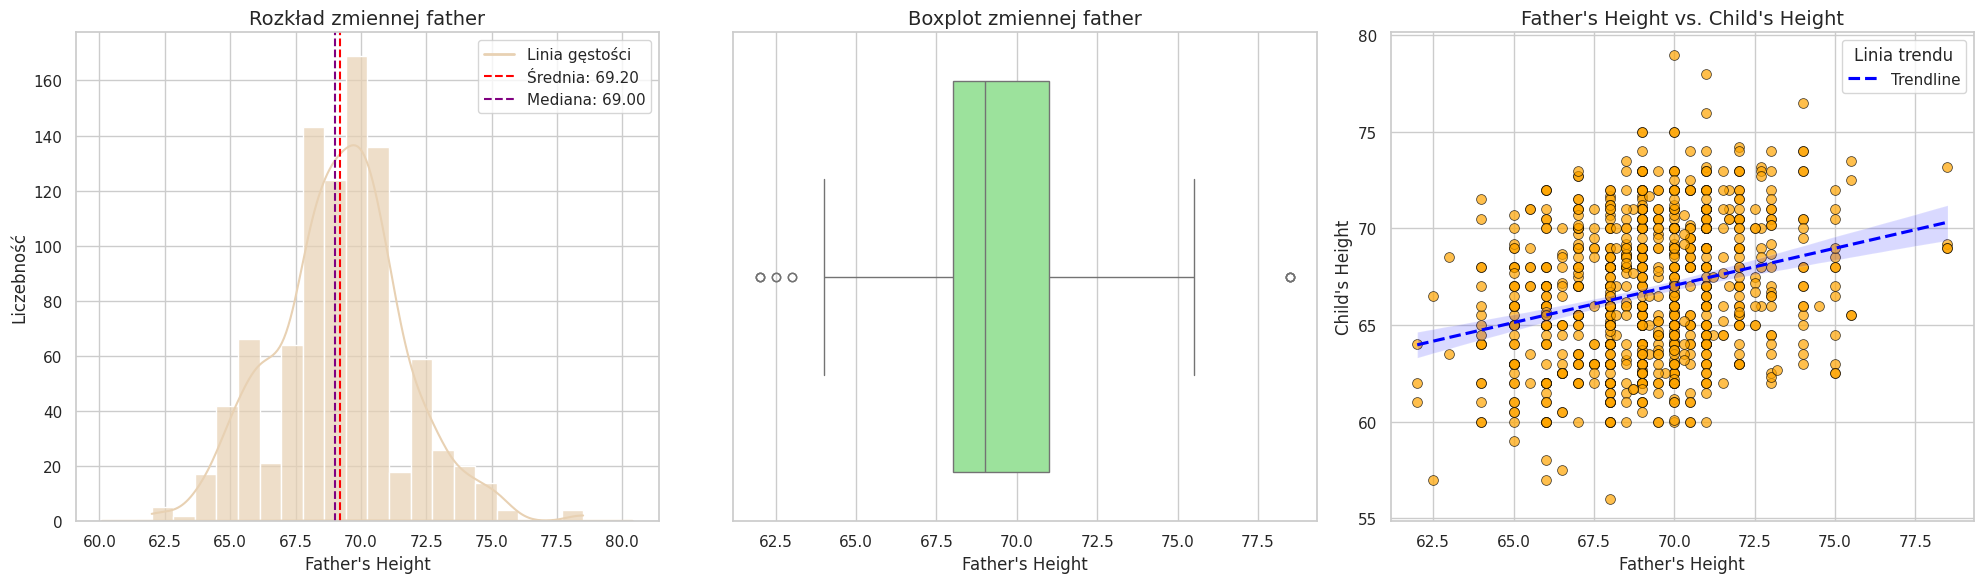

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia estetyczne
sns.set_theme(style="whitegrid", palette="pastel")

# Generowanie wykresów dla zmiennej `father`
plt.figure(figsize=(20, 6))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(data=selected_data, x='father', kde=True, bins=20, color='#e8d1b3', alpha=0.7, element="bars")
sns.kdeplot(data=selected_data['father'], color='#e8d1b3', linewidth=2, label='Linia gęstości')  # Linia gęstości w kolorze zielonym
plt.axvline(x=selected_data['father'].mean(), color='red', linestyle='--', label=f'Średnia: {selected_data["father"].mean():.2f}')  # Linia średniej w kolorze czerwonym
plt.axvline(x=selected_data['father'].median(), color='purple', linestyle='--', label=f'Mediana: {selected_data["father"].median():.2f}')  # Linia mediany w kolorze fioletowym
plt.legend()
plt.title('Rozkład zmiennej father', fontsize=14)
plt.xlabel('Father\'s Height', fontsize=12)
plt.ylabel('Liczebność', fontsize=12)

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=selected_data, x='father', color='lightgreen')
plt.title('Boxplot zmiennej father', fontsize=14)
plt.xlabel('Father\'s Height', fontsize=12)

# Scatterplot
plt.subplot(1, 3, 3)
sns.scatterplot(data=selected_data, x='father', y='childHeight', alpha=0.7, color='orange', edgecolor='black', s=50)
sns.regplot(data=selected_data, x='father', y='childHeight', scatter=False, color='blue', line_kws={'linestyle': '--'}, label='Trendline')
plt.title('Father\'s Height vs. Child\'s Height', fontsize=14)
plt.xlabel('Father\'s Height', fontsize=12)
plt.ylabel('Child\'s Height', fontsize=12)
plt.legend(title='Linia trendu')

plt.tight_layout()
plt.show()

**Wnioski:**

1. **Histogram:**

- Wykres: Górny histogram przedstawia rozkład wysokości ojców (Father's Height) w calach.

- Oś pozioma (x): Obejmuje przedziały wysokości ojców, od 62.5 do 77.5 cala.

- Oś pionowa (y): Pokazuje częstotliwość występowania danej wartości wysokości.

- Kształt rozkładu: Rozkład jest zbliżony do normalnego z lekkim przesunięciem w prawo.
Najwięcej wartości przypada w zakresie 68–71 cali.
Widoczne są wartości odstające po obu stronach, szczególnie poniżej 65 cali oraz pojedyncze powyżej 75 cali.
Krzywa gęstości wskazuje, że dane mają wyraźną koncentrację wokół średniej.

2. **Boxplot:**

- Wykres:przedstawia statystyki opisowe dla wysokości ojców, w tym medianę, kwartyle i wartości odstające.

- Oś pozioma (x): Zmienna "Father's Height" w calach.

- Oś pionowa (y): Rozkład wartości wzrostu od 62.5 do 77.5 cala.

- Interpretacja:
Linia wewnątrz pudełka: Oznacza medianę, wynoszącą około 70 cali.
Pudełko: Obejmuje 50% danych (od pierwszego kwartyla Q1 do trzeciego kwartyla Q3).
Dolna granica pudełka (Q1) to około 68 cali, a górna granica (Q3) to około 72 cale.
Wąsy: Sięgają do najdalszych wartości, które nie są uznane za odstające.
Wartości odstające: Wartości poniżej 63–64 cali oraz pojedyncza wartość powyżej 77 cali.


3. **Scatterplot:**

- Wyższy ojciec ma większe szanse na wyższe dziecko, co pokazuje liniowa zależność między wzrostem ojca a dziecka.

**b) Histogram, wykres pudełkowy i wykres rozrzutu dla zmiennej 'mother'**

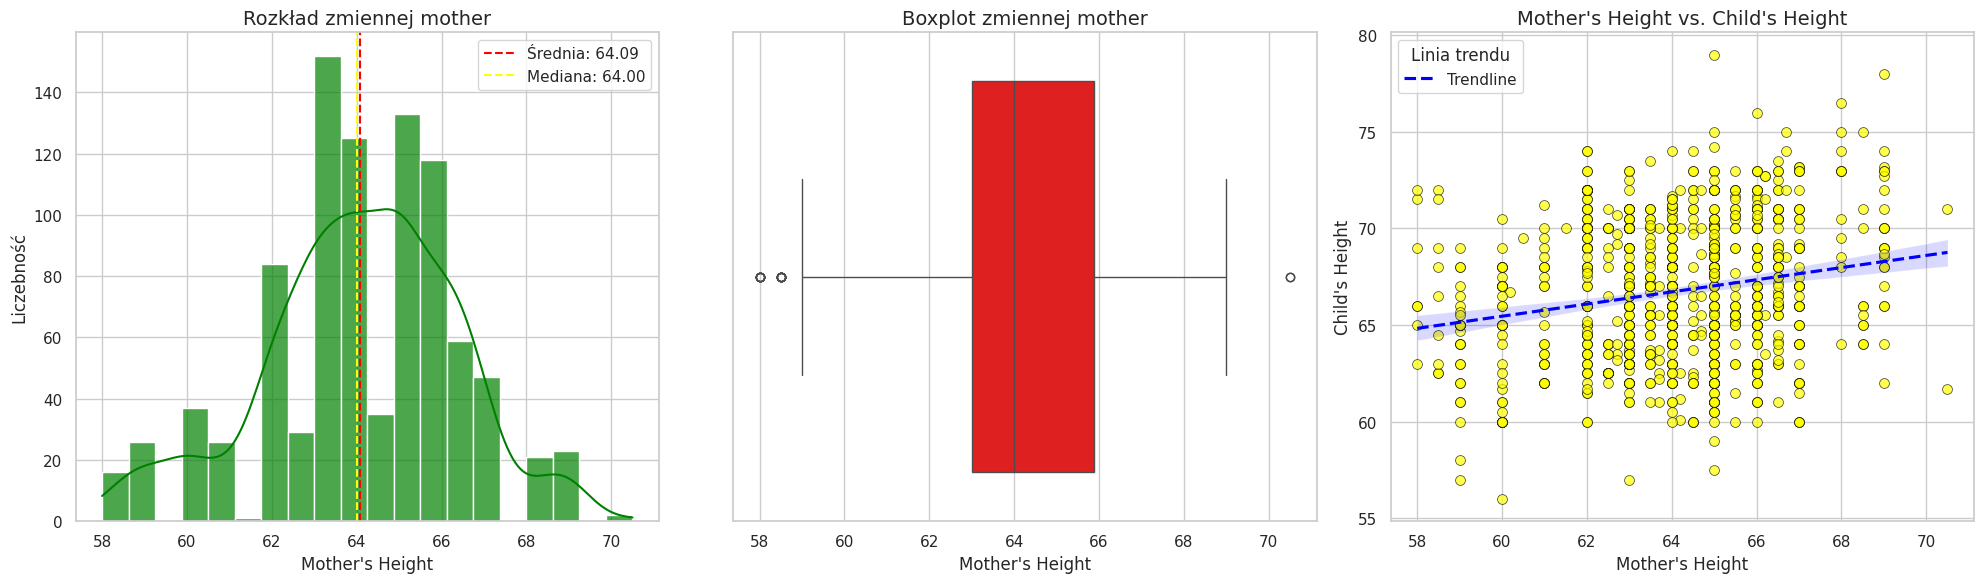

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia estetyczne
sns.set_theme(style="whitegrid", palette="pastel")

# Generowanie wykresów dla zmiennej `mother`
plt.figure(figsize=(20, 6))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(data=selected_data, x='mother', kde=True, bins=20, color='green', alpha=0.7, element="bars")
plt.axvline(x=selected_data['mother'].mean(), color='red', linestyle='--', label=f'Średnia: {selected_data["mother"].mean():.2f}')
plt.axvline(x=selected_data['mother'].median(), color='yellow', linestyle='--', label=f'Mediana: {selected_data["mother"].median():.2f}')
plt.legend()
plt.title('Rozkład zmiennej mother', fontsize=14)
plt.xlabel('Mother\'s Height', fontsize=12)
plt.ylabel('Liczebność', fontsize=12)

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=selected_data, x='mother', color='red')
plt.title('Boxplot zmiennej mother', fontsize=14)
plt.xlabel('Mother\'s Height', fontsize=12)

# Scatterplot
plt.subplot(1, 3, 3)
sns.scatterplot(data=selected_data, x='mother', y='childHeight', alpha=0.7, color='yellow', edgecolor='black', s=50)
sns.regplot(data=selected_data, x='mother', y='childHeight', scatter=False, color='blue', line_kws={'linestyle': '--'}, label='Trendline')
plt.title('Mother\'s Height vs. Child\'s Height', fontsize=14)
plt.xlabel('Mother\'s Height', fontsize=12)
plt.ylabel('Child\'s Height', fontsize=12)
plt.legend(title='Linia trendu')

# Ustawienie układu
plt.tight_layout()
plt.show()

**Wnioski:**
1. **Histogram:**

- Wykres: przedstawia rozkład wysokości matek (Mother's Height) w calach.

- Oś pozioma (x): Przedstawia przedziały wartości wysokości matek, od około 58 do 70 cali.

- Oś pionowa (y): Pokazuje częstotliwość wystąpień danej wartości wysokości (ile razy dana wartość występuje w zbiorze danych).

- Kształt rozkładu:
Histogram jest asymetryczny z lekkim przesunięciem w prawo (prawostronna skośność).
Najwięcej przypadków mieści się w zakresie 63-66 cali, co stanowi dominującą wartość wzrostu matek.
Krzywa gęstości wskazuje, że dane mają tendencję do normalnego rozkładu, lecz występują wartości odstające po obu stronach, głównie poniżej 60 cali oraz powyżej 68 cali.

2. **Boxplot:**

- Wykres: prezentuje rozkład wartości wysokości matek, z uwzględnieniem statystyk opisowych, takich jak mediana, kwartyle oraz wartości odstające.

- Oś pozioma (x): Zmienna "Mother's Height" w calach.

- Oś pionowa (y): Wartości zmiennej przedstawione w przedziale od 58 do 70 cali.

- Interpretacja:
Linia wewnątrz pudełka: Reprezentuje medianę wysokości matek (około 64-65 cali).
Pudełko: Obejmuje 50% danych (IQR - od pierwszego do trzeciego kwartyla).
Dolna krawędź pudełka (Q1) to około 63 cale, a górna krawędź pudełka (Q3) to około 66 cali.
Wąsy: Rozciągają się do najdalszych wartości, które nie są uznane za odstające.
Kropki poniżej i powyżej wąsów: Są to wartości odstające. Szczególnie widoczne są wartości poniżej 58-59 cali oraz jedna powyżej 70 cali.

3.**Scatterplot:**

- Wyższa matka generalnie wiąże się z wyższym dzieckiem, choć zależność jest mniej wyraźna niż w przypadku ojców.

**c) Histogram, wykres pudełkowy i wykres rozrzutu dla zmiennej 'MidParent'**

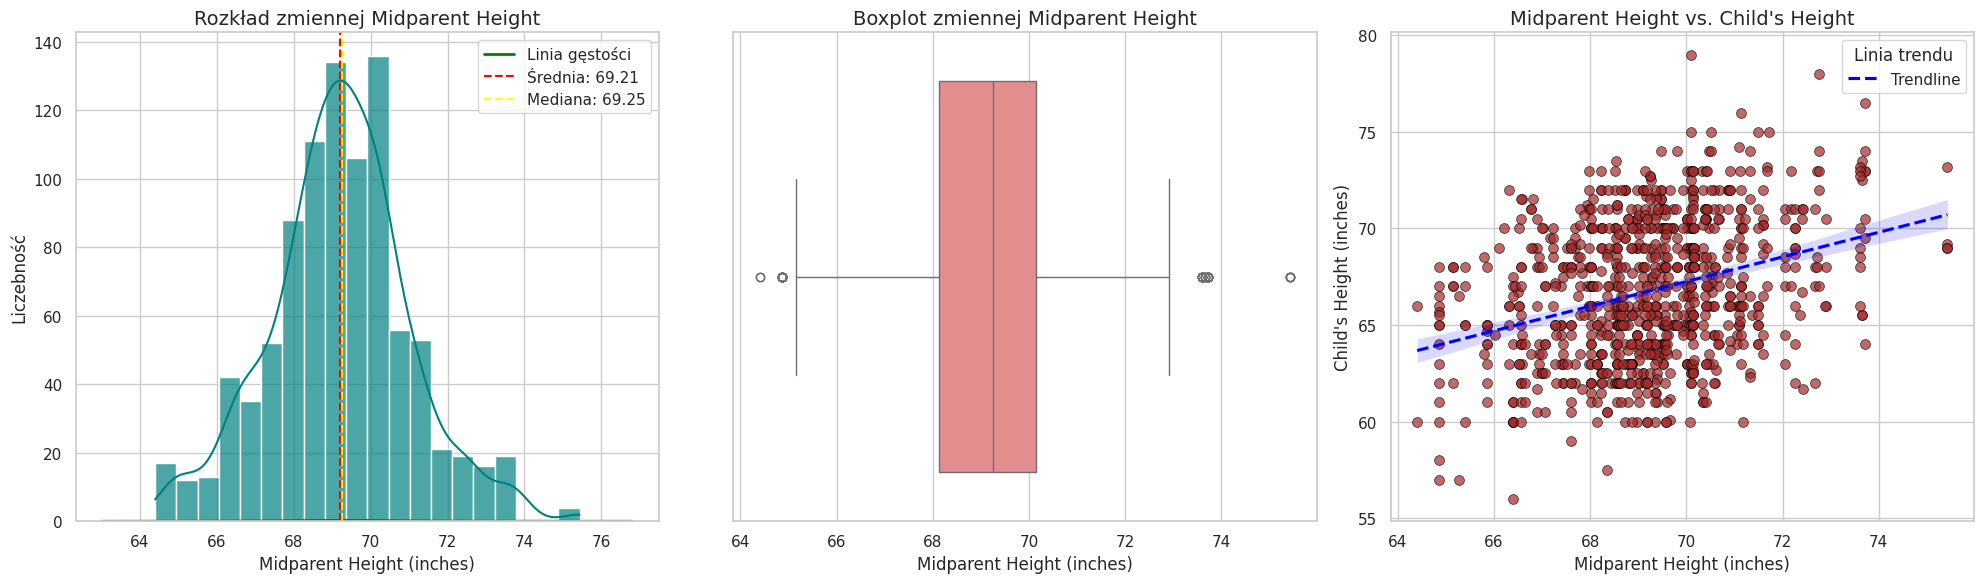

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(20, 6))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(data=selected_data, x='midparentHeight', kde=True, bins=20, color='teal', alpha=0.7, element="bars")
sns.kdeplot(data=selected_data['midparentHeight'], color='green', linewidth=2, label='Linia gęstości')
plt.axvline(x=selected_data['midparentHeight'].mean(), color='red', linestyle='--', label=f'Średnia: {selected_data["midparentHeight"].mean():.2f}')
plt.axvline(x=selected_data['midparentHeight'].median(), color='yellow', linestyle='--', label=f'Mediana: {selected_data["midparentHeight"].median():.2f}')
plt.legend()
plt.title('Rozkład zmiennej Midparent Height', fontsize=14)
plt.xlabel('Midparent Height (inches)', fontsize=12)
plt.ylabel('Liczebność', fontsize=12)

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=selected_data, x='midparentHeight', color='lightcoral')
plt.title('Boxplot zmiennej Midparent Height', fontsize=14)
plt.xlabel('Midparent Height (inches)', fontsize=12)

# Scatterplot
plt.subplot(1, 3, 3)
sns.scatterplot(data=selected_data, x='midparentHeight', y='childHeight', alpha=0.7, color='brown', edgecolor='black', s=50)
sns.regplot(data=selected_data, x='midparentHeight', y='childHeight', scatter=False, color='blue', line_kws={'linestyle': '--'}, label='Trendline')
plt.title('Midparent Height vs. Child\'s Height', fontsize=14)
plt.xlabel('Midparent Height (inches)', fontsize=12)
plt.ylabel('Child\'s Height (inches)', fontsize=12)
plt.legend(title='Linia trendu')


plt.tight_layout()
plt.show()


**Wnioski:**

1. **Histogram:**

- Wykres: przedstawia rozkład wartości "Midparent Height" (średniej wysokości rodziców) w calach.

- Oś pozioma (x): Przedstawia przedział wartości średniej wysokości rodziców (od około 64 do 75 cali).

- Oś pionowa (y): Reprezentuje częstotliwość wystąpień poszczególnych wartości (ile razy dana wysokość występuje w danych).

- Kształt rozkładu: Histogram jest zbliżony do rozkładu normalnego.

- Obserwacje:
Najwięcej przypadków znajduje się w przedziale 68-70 cali, co wskazuje na dominujący średni wzrost rodziców.
Rozkład jest symetryczny, ale występuje kilka odstających wartości po obu stronach (poniżej 65 i powyżej 74 cali).

2. **Boxplot:**

**a) Wykres:**

- przedstawia wartości "Midparent Height" w sposób skoncentrowany na statystykach opisowych, takich jak mediana, kwartyle i wartości odstające.

- Oś pozioma (x) - Oznaczenie zmiennej "Midparent Height" w calach.

- Oś pionowa (y) -  Przedstawia przedział wartości średniej wysokości rodziców.

**b) Interpretacja:**

- Linia wewnątrz pudełka: Reprezentuje medianę wartości (około 69 cali).

- Pudełko: Zawiera 50% danych (od pierwszego do trzeciego kwartyla - IQR). Dolna krawędź pudełka to Q1 (około 68 cali), a górna krawędź to Q3 (około 70,5 cala).

- Wąsy: Rozciągają się do najdalszych punktów, które nie są uznane za wartości odstające.

- Kropki poza wąsami: Są to wartości odstające. Wartości poniżej 65 cali i powyżej 73,5 cala są uznawane za nietypowe.

3. **Scatterplot:**

- Średni wzrost rodziców jest silnie skorelowany z wzrostem dziecka, co potwierdza tę cechę jako bardzo istotną.

**d) Histogram i wykres pudełkowy dla zmiennej 'Number of Children'**

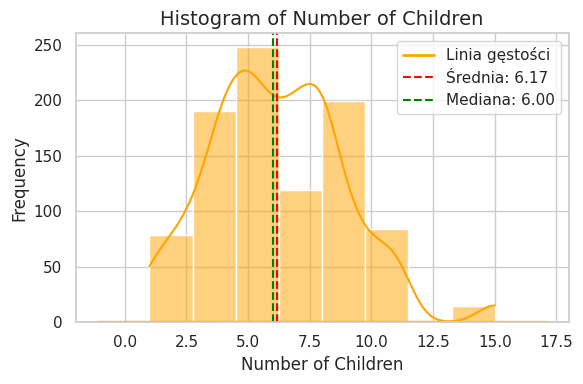

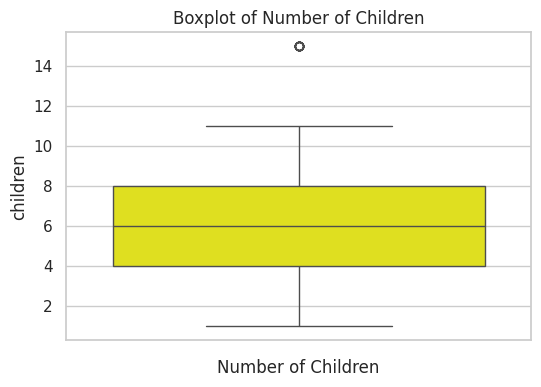

In [ ]:
# Histogram dla liczby dzieci
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(6, 4))

# Histogram
sns.histplot(selected_data['children'], kde=True, bins=8, color='orange')
sns.kdeplot(selected_data['children'], color='orange', linewidth=2, label='Linia gęstości')
plt.axvline(x=selected_data['children'].mean(), color='red', linestyle='--', label=f'Średnia: {selected_data["children"].mean():.2f}')
plt.axvline(x=selected_data['children'].median(), color='green', linestyle='--', label=f'Mediana: {selected_data["children"].median():.2f}')
plt.legend()
plt.title('Histogram of Number of Children', fontsize=14)
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Boxplot dla liczby dzieci
plt.figure(figsize=(6, 4))
sns.boxplot(data=selected_data['children'], color='yellow')
plt.title('Boxplot of Number of Children')
plt.xlabel('Number of Children')
plt.show()


**Wnioski:**
1. **Histogram:**
**a) Najczęstsza liczba dzieci (moda):**

- Najczęstsza liczba dzieci w rodzinach to 6, co można zauważyć jako najwyższy słupek na wykresie.

**b) Rozkład danych:**

- Większość rodzin ma od 4 do 8 dzieci, co stanowi główny zakres wartości w rozkładzie.
- Rozkład jest lekko skośny w prawo, z kilkoma rodzinami o liczbie dzieci wyraźnie większej niż 10.

**c) Obecność wartości odstających:**

- Rodzina z 14 dziećmi (widoczna jako pojedynczy słupek po prawej stronie wykresu) jest wartością odstającą, która znacząco różni się od reszty danych.

**d) Częstotliwość:**

- Rodziny z liczbą dzieci pomiędzy 4 a 6 są najliczniejsze, osiągając szczyt na poziomie około 250 rodzin.
Liczba rodzin gwałtownie spada, gdy liczba dzieci przekracza 8.
- Liczba dzieci w rodzinach jest asymetryczna – większość rodzin ma 4 dzieci, ale zdarzają się rodziny z jednym lub nawet ośmiorgiem dzieci.

2. **Boxplot:**

**a) Mediana:**

- Mediana liczby dzieci wynosi około 6, co oznacza, że połowa rodzin ma mniej niż 6 dzieci, a połowa więcej.

**b) Pudełko:**

- Dolna granica pudełka (25. percentyl, Q1) to około 4 dzieci.
- Górna granica pudełka (75. percentyl, Q3) to około 8 dzieci.
- Wartości w zakresie między Q1 a Q3 obejmują 50% obserwacji.

**c) Wąsy:**

- Dolny wąs rozciąga się do około 2 dzieci, a górny do około 10 dzieci. Są to wartości mieszczące się w 1,5-krotności rozstępu międzykwartylowego.

**d) Wartości odstające (Outliers):**

- Widoczna jest jedna wartość odstająca (outlier) powyżej górnego wąsa, reprezentująca rodzinę z około 14 dziećmi. Taka liczba dzieci jest nietypowa w porównaniu do większości rodzin w zbiorze.


**e) Histogram i wykres pudełkowy dla zminnej 'Child's Height'**

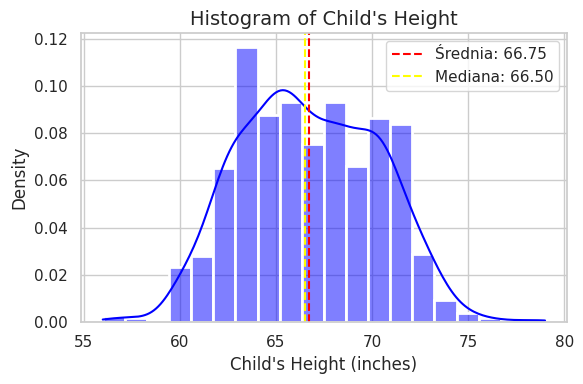

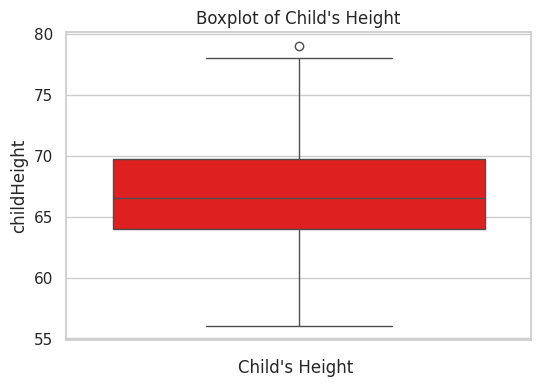

In [ ]:
# Histogram dla wzrostu dziecka
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(6, 4))

# Histogram
sns.histplot(selected_data['childHeight'], kde=True, bins=20, color='blue', stat="density", linewidth=2)
plt.axvline(x=selected_data['childHeight'].mean(), color='red', linestyle='--', label=f'Średnia: {selected_data["childHeight"].mean():.2f}')
plt.axvline(x=selected_data['childHeight'].median(), color='yellow', linestyle='--', label=f'Mediana: {selected_data["childHeight"].median():.2f}')
plt.legend()
plt.title('Histogram of Child\'s Height', fontsize=14)
plt.xlabel('Child\'s Height (inches)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

# Boxplot dla wzrostu dziecka
plt.figure(figsize=(6, 4))
sns.boxplot(data=selected_data['childHeight'], color='red')
plt.title('Boxplot of Child\'s Height')
plt.xlabel('Child\'s Height ')
plt.show()

**Wnioski:**

1. **Histogram:**

- Rozkład wzrostu dzieci jest zbliżony do normalnego.
- Najwięcej dzieci ma wzrost w przedziale 65–70 cali.

2. **Boxplot:**

**a) Mediana (linia wewnątrz pudełka):**

- Mediana wynosi około 68 cali, co oznacza, że połowa dzieci ma wzrost mniejszy, a połowa większy niż ta wartość.

**b) Kwartyle (dolna i górna granica pudełka):**

- Dolny kwartyl (25%) wynosi około 66 cali, co oznacza, że 25% dzieci ma wzrost mniejszy niż ta wartość.
- Górny kwartyl (75%) wynosi około 70 cali, co oznacza, że 75% dzieci ma wzrost mniejszy niż ta wartość.

**c) Zakres międzykwartylowy (IQR):**

- IQR wynosi około 4 cale (70 - 66 cali). To zakres, w którym znajduje się 50% dzieci z "typowym" wzrostem.

**d) Wąsy wykresu:**

- Dolna granica (minimum): Wartość wynosi około 55 cali, co jest najmniejszym wzrostem nieuznanym za odstający.
- Górna granica (maksimum): Wartość wynosi około 77 cali, co jest największym wzrostem nieuznanym za odstający.

**e) Wartości odstające (outliers):**

- Na wykresie widzimy jedną wartość odstającą powyżej 77 cali, co wskazuje na wyjątkowo wysokie dziecko.

## 6. Przygotowanie danych
   - Analiza typu danych, wykrywanie brakujących wartości, detekcja i obsługa outlierów.

### Analiza danych wejściowych: typy danych i brakujące wartości

In [ ]:
# Wybór kolumn do analizy
selected_columns = ['father', 'mother', 'midparentHeight', 'children', 'childHeight']
selected_data = data[selected_columns]

# Informacje o typie danych i brakujących wartościach
print("Informacje o danych:")
print(selected_data.info())
print("\nLiczba brakujących wartości w każdej kolumnie:")
print(selected_data.isnull().sum())

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   father           934 non-null    float64
 1   mother           934 non-null    float64
 2   midparentHeight  934 non-null    float64
 3   children         934 non-null    int64  
 4   childHeight      934 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 36.6 KB
None

Liczba brakujących wartości w każdej kolumnie:
father             0
mother             0
midparentHeight    0
children           0
childHeight        0
dtype: int64


#### Informacje o typie danych:
- Wszystkie wybrane kolumny są typu **float64** (zmienne ilościowe) poza kolumną **`children`**, która jest typu **int64** (liczba całkowita).

### Brakujące wartości:
- **Brakujące wartości**: W żadnej z wybranych kolumn (**`father`**, **`mother`**, **`midparentHeight`**, **`children`**, **`childHeight`**) nie ma brakujących danych. Każda kolumna zawiera 934 obserwacje.





### Identyfikacja wartości odstających

In [ ]:
# Funkcja identyfikująca wartości odstające (reguła 1.5xIQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Pierwszy kwartyl
    Q3 = df[column].quantile(0.75)  # Trzeci kwartyl
    IQR = Q3 - Q1  # Rozstęp międzykwartylowy
    lower_bound = Q1 - 1.5 * IQR  # Dolna granica
    upper_bound = Q3 + 1.5 * IQR  # Górna granica
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Sprawdzenie wartości odstających dla każdej kolumny
for column in selected_columns:
    outliers = detect_outliers(selected_data, column)
    print(f"\nKolumna: {column}")
    print(f"Liczba wartości odstających: {outliers.shape[0]}")
    if not outliers.empty:
        print("Przykładowe wartości odstające:")
        print(outliers[[column]].head())


Kolumna: father
Liczba wartości odstających: 11
Przykładowe wartości odstające:
     father
0      78.5
1      78.5
2      78.5
3      78.5
927    63.0

Kolumna: mother
Liczba wartości odstających: 18
Przykładowe wartości odstające:
    mother
15    58.5
16    58.5
17    58.5
18    58.5
19    58.5

Kolumna: midparentHeight
Liczba wartości odstających: 40
Przykładowe wartości odstające:
   midparentHeight
0            75.43
1            75.43
2            75.43
3            75.43
4            73.66

Kolumna: children
Liczba wartości odstających: 15
Przykładowe wartości odstające:
     children
844        15
845        15
846        15
847        15
848        15

Kolumna: childHeight
Liczba wartości odstających: 1
Przykładowe wartości odstające:
     childHeight
292         79.0



### Informacje o wartościach odstających (outliers):
Na podstawie boxplotów i statystyk opisowych:
1. **Father (ojciec)**:
   - Potencjalne wartości odstające w górnym zakresie: wzrost powyżej **78.5** cala.
   - Możliwe odstające wartości w dolnym zakresie: wzrost bliski dolnemu zakresowi (np. **62.0** cala).

2. **Mother (matka)**:
   - Wartości odstające mogą występować w górnym zakresie (wzrost powyżej **70.5** cala).
   - Dolny zakres (wzrost **58.0** cala) również może wskazywać na odstające obserwacje.

3. **MidparentHeight (wysokość środkowa rodzica)**:
   - Brak wyraźnych wartości odstających. Większość danych mieści się w zakresie od **64.4** do **75.4** cala, co jest spójne z oczekiwaniami dla tej zmiennej.

4. **Children (liczba dzieci)**:
   - Liczby dzieci wyższe niż **12** mogą być odstające. Wartość maksymalna (**15 dzieci**) jest rzadka i wykracza poza typowy zakres (8 dzieci – trzeci kwartyl).

5. **ChildHeight (wzrost dzieci)**:
   - Możliwe wartości odstające w dolnym zakresie (np. wzrost **56.0 cala**) i w górnym zakresie (np. wzrost **79.0 cala**).

---



## 7. Wstępne uczenie modeli
   - Wstępne uczenie modeli dla ustalenia początkowego poziomu skuteczności.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Wybór cech i zmiennej celu
X = selected_data[['father', 'mother', 'midparentHeight', 'children']]  # Cecha predyktorów
y = selected_data['childHeight']  # Zmienna celu

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model 1: Regresja liniowa
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Ocena modeli
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Wyświetlenie wyników
print("Wstępne wyniki modeli:")
print("Regresja liniowa:")
print(f"  - Mean Squared Error (MSE): {linear_mse:.3f}")
print(f"  - R-squared (R²): {linear_r2:.3f}")

print("\nRandom Forest Regressor:")
print(f"  - Mean Squared Error (MSE): {rf_mse:.3f}")
print(f"  - R-squared (R²): {rf_r2:.3f}")

Wstępne wyniki modeli:
Regresja liniowa:
  - Mean Squared Error (MSE): 11.813
  - R-squared (R²): 0.132

Random Forest Regressor:
  - Mean Squared Error (MSE): 13.342
  - R-squared (R²): 0.019


### Analiza wstępnych wyników modeli:

#### 1. **Regresja Liniowa:**
   - **Mean Squared Error (MSE)**: 11.813
   - **R-squared (R²)**: 0.132

#### 2. **Random Forest Regressor:**
   - **Mean Squared Error (MSE)**: 13.342
   - **R-squared (R²)**: 0.019

---

### Wnioski:
1. **Niska skuteczność obu modeli**:
   - Zarówno regresja liniowa, jak i Random Forest Regressor osiągnęły bardzo niskie wartości **R²**, co wskazuje na słabą zdolność do wyjaśnienia zmienności danych. Model Random Forest ma szczególnie słaby wynik, z **R² = 0.019**, co sugeruje, że model nie ma zbyt dużej mocy predykcyjnej.
   - **MSE** wskazuje, że oba modele mają stosunkowo duży błąd predykcji, szczególnie Random Forest, który ma wyższy błąd niż regresja liniowa.

## 8. Optymalizacja i czyszczenie danych
   - Usuwanie kolumn o małej wariancji, wyznaczenie korelacji pomiędzy cechami i usuwanie cech o wysokiej korelacji, a także obsługa outlierów.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import VarianceThreshold

### Wybór cech predyktorów i zmiennej celu

In [ ]:
X = selected_data[['father', 'mother', 'midparentHeight', 'children']]
y = selected_data['childHeight']

### Usuwanie kolumn o małej wariancji

In [ ]:
var_thresh = VarianceThreshold(threshold=0.01)
X_reduced_variance = var_thresh.fit_transform(X)

# Przekształcenie z powrotem do DataFrame z zachowaniem nazw kolumn
reduced_columns = X.columns[var_thresh.get_support()]
X = pd.DataFrame(X_reduced_variance, columns=reduced_columns)

### Usuwanie wysoko skorelowanych cech

In [ ]:
correlation_matrix = X.corr()
high_corr_features = [
    column for column in correlation_matrix.columns
    if any(correlation_matrix[column].abs() > 0.9) and column != column
]
X = X.drop(columns=high_corr_features, errors='ignore')  # Usunięcie wysoko skorelowanych kolumn
print(X)

     father  mother  midparentHeight  children
0      78.5    67.0            75.43       4.0
1      78.5    67.0            75.43       4.0
2      78.5    67.0            75.43       4.0
3      78.5    67.0            75.43       4.0
4      75.5    66.5            73.66       4.0
..      ...     ...              ...       ...
929    62.0    66.0            66.64       3.0
930    62.0    66.0            66.64       3.0
931    62.0    66.0            66.64       3.0
932    62.5    63.0            65.27       2.0
933    62.5    63.0            65.27       2.0

[934 rows x 4 columns]


In [ ]:
# Obliczanie macierzy korelacji
correlation_matrix = X.corr()

# Zbiór do przechowywania nazw kolumn do usunięcia
high_corr_features = set()

for column in correlation_matrix.columns:
    for other_column in correlation_matrix.columns:
        if column != other_column:
            if correlation_matrix[column][other_column] > 0.9:  # Korelacja większa niż 0.9
                high_corr_features.add(other_column)  # Dodajemy kolumnę do usunięcia

# Usuwamy tylko te cechy, które są wysoko skorelowane
X = X.drop(columns=high_corr_features, errors='ignore')  # Usuwanie wysoko skorelowanych kolumn

### Detekcja wartości odstających za pomocą Isolation Forest

In [ ]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(X)

# Usunięcie outlierów
X_cleaned = X[outlier_labels == 1]
y_cleaned = y[outlier_labels == 1]

### Zapis oczyszczonego zbioru do pliku CSV

In [ ]:
cleaned_data = pd.concat([X_cleaned.reset_index(drop=True), y_cleaned.reset_index(drop=True)], axis=1)
cleaned_data.to_csv('cleaned_data.csv', index=False)

## 9. Zaawansowane uczenie modeli
   - Uczenie modeli po rozszerzeniu zbioru danych, wskazanie najistotniejszych cech oraz ocena skuteczności.

### Uczenie modeli na zbiorze oczyszczonym

In [ ]:
# Wybór cech i zmiennej celu
X = cleaned_data[['father', 'mother', 'midparentHeight', 'children']]  # Cecha predyktorów
y = cleaned_data['childHeight']  # Zmienna celu

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model 1: Regresja liniowa
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Ocena modeli
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Wyświetlenie wyników
print("Wstępne wyniki modeli:")
print("Regresja liniowa:")
print(f"  - Mean Squared Error (MSE): {linear_mse:.3f}")
print(f"  - R-squared (R²): {linear_r2:.3f}")

print("\nRandom Forest Regressor:")
print(f"  - Mean Squared Error (MSE): {rf_mse:.3f}")
print(f"  - R-squared (R²): {rf_r2:.3f}")

Wstępne wyniki modeli:
Regresja liniowa:
  - Mean Squared Error (MSE): 11.455
  - R-squared (R²): 0.008

Random Forest Regressor:
  - Mean Squared Error (MSE): 13.018
  - R-squared (R²): -0.127


### Wnioski:

1. **Regresja liniowa**:
   - Model regresji liniowej uzyskał wartość błędu średniokwadratowego (MSE) równą **11.455**, co oznacza umiarkowany poziom błędu w przewidywaniu zmiennej celu.
   - Wartość współczynnika determinacji ($R^2 = 0.008$) sugeruje, że model praktycznie nie wyjaśnia zmienności zmiennej celu (wynik bliski 0 oznacza brak dopasowania do danych).
   - Wynik ten wskazuje, że regresja liniowa nie jest odpowiednim modelem dla tych danych, ponieważ nie ma wyraźnej liniowej zależności między cechami a zmienną celu.

2. **Random Forest Regressor**:
   - Model Random Forest uzyskał wartość MSE równą **13.018**, co oznacza nieco wyższy błąd w porównaniu z regresją liniową.
   - Wartość ($ R^2 = -0.127 $) sugeruje, że model działa gorzej niż prosty model średniej, który przewiduje jedną stałą wartość (średnią zmiennej celu) dla wszystkich przykładów.

3. **Porównanie modeli**:
   - Oba modele mają słabe wyniki w przewidywaniu zmiennej celu. Wartość ($R^2 $) dla obu modeli (szczególnie dla Random Forest) sugeruje, że żaden z nich nie radzi sobie dobrze z dopasowaniem danych.

### Tworzenie nowych cech

In [ ]:
# Dodanie nowych cech
X['parents_product'] = X['father'] * X['mother']  # Iloczyn wzrostów rodziców
X['parents_average'] = (X['father'] + X['mother'])/2 # Średni wzrost rodziców
X['father_midparent_interaction'] = X['father'] * X['midparentHeight']
X['children_father_interaction'] = X['children'] * X['father']


# Zmienna celu
y = cleaned_data['childHeight']

Dodano nowe cechy do zbioru danych, aby uchwycić bardziej złożone zależności między istniejącymi zmiennymi a zmienną celu (`childHeight`):  

1. **`parents_product`**: iloczyn wzrostów ojca i matki, aby modelować wpływ wspólnej cechy rodziców.  
2. **`parents_average`**: średnia wzrostów rodziców, reprezentująca wspólny wpływ na wzrost dziecka.  
3. **`father_midparent_interaction`**: interakcja między wzrostem ojca a wzrostem średnim rodziców, co może wskazywać na dominujący wpływ ojca w relacji ze średnim wzrostem rodziców.  
4. **`children_father_interaction`**: iloczyn liczby dzieci i wzrostu ojca, aby uchwycić ewentualny wpływ liczby dzieci na przewidywania wzrostu.  

Te nowe cechy mają na celu poprawę jakości modeli poprzez wprowadzenie bardziej zaawansowanego opisu zależności w danych.

#### Standaryzacja danych


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Zamiana na DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

### Podział na dane treningowe i testowe

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_cleaned, test_size=0.3, random_state=42)

#### Tworzenie modelu Random Forest i identyfikacja ważności cech

In [ ]:
# Inicjalizacja modelu RandomForest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predykcje
y_pred = rf.predict(X_test)

# Ważność cech
feature_importances = rf.feature_importances_
important_features = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Wyniki
print("Ważność cech:")
print(important_features)

Ważność cech:
                        Feature  Importance
7   children_father_interaction    0.240377
4               parents_product    0.173550
2               midparentHeight    0.157556
6  father_midparent_interaction    0.157324
1                        mother    0.098782
3                      children    0.066814
0                        father    0.063643
5               parents_average    0.041954


### Ważność cech – interpretacja:  

1. **Najważniejsze cechy**:
   - **`children_father_interaction` (0.240377)**: Iloczyn liczby dzieci i wzrostu ojca jest najbardziej znaczącą cechą, co sugeruje, że interakcja między tymi zmiennymi odgrywa kluczową rolę w przewidywaniu wzrostu dziecka.  
   - **`parents_product` (0.173550)**: Iloczyn wzrostów rodziców również istotnie wpływa na zmienną celu, co podkreśla znaczenie wspólnego wkładu obojga rodziców.  

2. **Cechy o średniej ważności**:
   - **`midparentHeight` (0.157556)** i **`father_midparent_interaction` (0.157324)**: Średni wzrost rodziców oraz interakcja wzrostu ojca z tym parametrem są równie istotne. To potwierdza, że połączenie wzrostów rodziców ma znaczenie dla wzrostu dziecka.  

3. **Mniejsza ważność**:
   - **`mother` (0.098782)** i **`children` (0.066814)**: Wzrost matki i liczba dzieci mają umiarkowany wpływ.  
   - **`father` (0.063643)**: Sam wzrost ojca jest mniej istotny niż cechy uwzględniające interakcje.  
   - **`parents_average` (0.041954)**: Średni wzrost rodziców ma najmniejszy wpływ, co może wynikać z redundancji w stosunku do innych cech (np. `parents_product`).
---

### Wnioski:
- Dodanie cech interakcji zwiększyło znaczenie zmiennych związanych z kombinacją wzrostów rodziców, co lepiej modeluje zależności w danych.  
- Cecha **`children_father_interaction`** może wskazywać na złożony wpływ liczby dzieci i wzrostu ojca, który wcześniej był niedostrzegalny.

### Wizualizacja ważności cech

<ipython-input-243-ef0dd53ffe69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=important_features, x='Importance', y='Feature', palette='viridis')


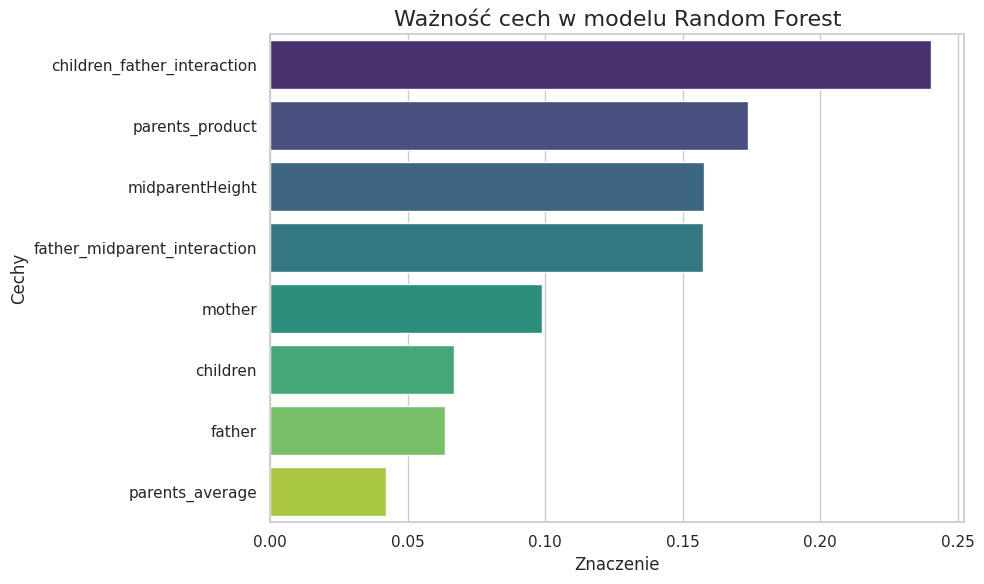

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=important_features, x='Importance', y='Feature', palette='viridis')
plt.title('Ważność cech w modelu Random Forest', fontsize=16)
plt.xlabel('Znaczenie', fontsize=12)
plt.ylabel('Cechy', fontsize=12)
plt.tight_layout()
plt.show()

### Ocena modelu

In [ ]:
# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_after = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2_after:.2f}')

MSE: 12.98
RMSE: 3.60
R^2: -0.12


### Ocena modelu – interpretacja wyników:

1. **MSE (Mean Squared Error): 12.98**  
   - Wartość MSE wskazuje na średni błąd kwadratowy między przewidywanymi a rzeczywistymi wartościami wzrostu dziecka. MSE wynoszące 12.98 oznacza umiarkowanie duże różnice między przewidywaniami a obserwacjami.  

2. **RMSE (Root Mean Squared Error): 3.60**  
   - RMSE jest pierwiastkiem z MSE i wyrażony jest w tej samej jednostce, co zmienna celu (wzrost dziecka). Wartość 3.60 wskazuje na przeciętny błąd predykcji wynoszący około 3.6 jednostek wzrostu, co można uznać za znaczne w kontekście przewidywań wzrostu.  

3. **($R^2$) (R-squared): -0.12**  
   - Ujemna wartość ($R^2$) wskazuje, że model działa gorzej niż prosty model przewidujący stałą wartość (średnią wzrostu dziecka dla zbioru testowego). To oznacza, że model nie jest w stanie poprawnie uchwycić zależności w danych.

---

### Wnioski:
- Wyniki wskazują, że model ma problemy z dopasowaniem do danych i nie radzi sobie dobrze z przewidywaniem zmiennej celu.

### Testowanie innych modeli regresji

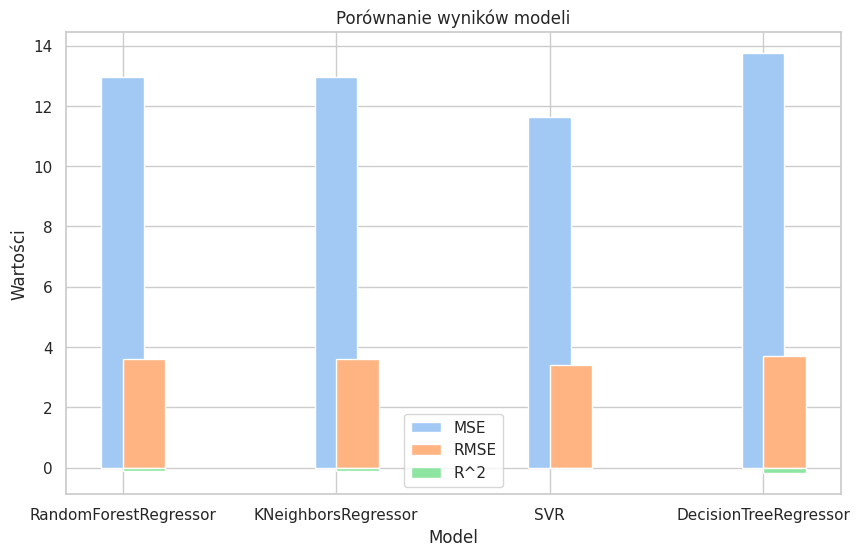

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Lista modeli do przetestowania
models = [RandomForestRegressor(random_state=42),
          KNeighborsRegressor(),
          SVR(),
          DecisionTreeRegressor(random_state=42)]

# Przygotowanie słownika na wyniki
results = {'Model': [], 'MSE': [], 'RMSE': [], 'R^2': []}

# Testowanie modeli
for model in models:
    # Dopasowanie modelu na danych
    model.fit(X_train, y_train)

    # Predykcje
    y_pred = model.predict(X_test)

    # Obliczanie metryk
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Zapisanie wyników do słownika
    results['Model'].append(model.__class__.__name__)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R^2'].append(r2)

# Teraz mamy wyniki, możemy stworzyć wykres
fig, ax = plt.subplots(figsize=(10, 6))

# Wykres dla MSE
ax.bar(results['Model'], results['MSE'], width=0.2, label='MSE', align='center')

# Wykres dla RMSE
ax.bar(results['Model'], results['RMSE'], width=0.2, label='RMSE', align='edge')

# Wykres dla R^2
ax.bar(results['Model'], results['R^2'], width=0.2, label='R^2', align='edge')

# Ustawienia wykresu
ax.set_xlabel('Model')
ax.set_ylabel('Wartości')
ax.set_title('Porównanie wyników modeli')
ax.legend()

# Wyświetlenie wykresu
plt.show()

### Analiza wykresu:  

1. **MSE i RMSE**:  
   Wszystkie modele mają podobne wyniki pod względem MSE i RMSE, co oznacza, że żaden z nich nie zapewnia znaczącej poprawy w stosunku do innych. Błędy są w granicach około **13 (MSE)** i **3.6 (RMSE)**, co wskazuje na umiarkowaną skuteczność modeli.  

2. **$R^2$ (R-squared)**:  
   Wartości $(R^2)$ są bliskie zera lub ujemne dla wszystkich modeli, co sugeruje, że żaden z modeli nie potrafi dobrze uchwycić zależności w danych. Oznacza to, że ich przewidywania są niewiele lepsze (lub nawet gorsze) niż średnia wzrostu dziecka.  

3. **Porównanie modeli**:  
   Modele **Random Forest**, **KNeighborsRegressor**, **SVR**, i **DecisionTreeRegressor** mają bardzo podobne wyniki. Żaden model nie wyróżnia się jako wyraźnie lepszy.  

---

### Wnioski:  
- Dane mogą wymagać dalszego przetworzenia lub stworzenia lepszych cech, ponieważ obecne modele nie są w stanie skutecznie przewidzieć zmiennej celu.

## Porównanie skuteczności modelu Random Forest Regressor przed i po dodaniu nowych cech:

### Przed dodaniem nowych cech:
- **Mean Squared Error (MSE)**: 13.018
- **R-squared (R²)**: -0.127

### Po dodaniu nowych cech:
- **Mean Squared Error (MSE)**: 12.98
- **Root Mean Squared Error (RMSE)**: 3.60
- **R-squared (R²)**: -0.12

---

### Analiza:
1. **MSE (Mean Squared Error)**: Po dodaniu nowych cech MSE nie zmieniło się znacząco, zmniejszając się jedynie o $0.038$ $(13.018 -> 12.98)$. To sugeruje, że nowe cechy nie miały dużego wpływu na zmniejszenie średniego błędu kwadratowego.
   
2. **RMSE (Root Mean Squared Error)**: Wartość RMSE wynosi teraz $3.60$, co jest wciąż dosyć wysoką wartością, ale może sugerować pewną poprawę w porównaniu do wcześniejszego modelu.

3. **R-squared (R²)**: Wartość $R^2$ wzrosła nieznacznie z $-0.127$ do $-0.12$. Choć zmiana jest niewielka, nadal jest to wartość ujemna, co oznacza, że model nie pasuje lepiej do danych niż model bazowy (średnia wartość). Wzrost $R^2$ o $0.007$ sugeruje, że dodanie nowych cech mogło wpłynąć na poprawę dopasowania, ale nie na tyle, by model stał się efektywny.

---

### Wnioski:
- **Zmiana w R²**: Zmiana $R^2$ o $0.007$ oznacza niewielką poprawę, ale nadal wartości $R^2$ są negatywne, co oznacza, że model nadal nie jest w stanie dobrze dopasować się do danych.
- **MSE i RMSE**: Mimo małej zmiany w MSE, wartość RMSE również wskazuje na to, że model nadal nie jest dokładny. Wartość RMSE $3.60$ sugeruje, że prognozy są wciąż stosunkowo niedokładne.

---

### Podsumowanie:
Dodanie nowych cech nie miało istotnego wpływu na poprawę wyników modelu Random Forest Regressor. Mimo małej poprawy w $R^2$, model nadal nie osiągnął dobrego dopasowania do danych. Warto spróbować dalszych modyfikacji, takich jak optymalizacja hiperparametrów, rozważenie innych cech lub próbę z innymi algorytmami modelowania.

### Zapis rozszerzonego zbioru do pliku CSV

In [ ]:
X['childHeight'] = y_cleaned  # Dodanie zmiennej celu do zbioru cech
X.to_csv('rozszerzony_zbior.csv', index=False)

## 10. Redukcja wymiarów
  - Przeprowadzenie analizy PCA i ICA w celu redukcji wymiarów i analizy wyników.



### Przygotowanie danych

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Wybór danych do analizy
raw_data = data[['father', 'mother', 'midparentHeight', 'children', 'childHeight']]

# Standaryzacja danych
scaler = StandardScaler()
x_scaled = scaler.fit_transform(raw_data)

print(f"Scaled mean: {x_scaled.mean(axis=0)}")
print(f"Scaled std: {x_scaled.std(axis=0)}")


Scaled mean: [ 8.52042681e-16 -1.88666594e-15  6.08601915e-16 -1.52150479e-16
  2.25182709e-15]
Scaled std: [1. 1. 1. 1. 1.]


**Średnia po skalowaniu:**

Wartości średnich są bardzo bliskie 0, co potwierdza poprawność standaryzacji.
Minimalne odchylenia od zera wynikają z precyzji obliczeń numerycznych.

**Odchylenie standardowe po skalowaniu:**

Wszystkie cechy mają odchylenie standardowe równe 1, co oznacza, że dane zostały znormalizowane względem skali.

### Obliczanie wariancji wyjaśnionej

In [ ]:
# Tworzenie obiektu PCA
pca = PCA()

# Dopasowanie PCA do znormalizowanych danych
pca.fit(x_scaled)
variances = pca.explained_variance_ratio_

print(f"Variances: {variances}")

zeros = (variances < 0.01).sum()
print(f"Zeros: {zeros}")

# Obliczenie skumulowanej wariancji
cumulated_variances = variances.cumsum()
print(f"Cumulated variances: {cumulated_variances}")

# Liczba komponentów dla 95% wyjaśnionej wariancji
dim_095 = (cumulated_variances < 0.95).sum() + 1
print(f"Dimension with 0.95: {dim_095}")


Variances: [4.53952929e-01 2.10513497e-01 1.74213655e-01 1.61319918e-01
 3.22962932e-16]
Zeros: 1
Cumulated variances: [0.45395293 0.66446643 0.83868008 1.         1.        ]
Dimension with 0.95: 4


a) Proporcje wariancji wyjaśnionej przez poszczególne składowe:

- Pierwsza składowa wyjaśnia około 45,4% wariancji, a druga kolejne 21,1%.
Łącznie cztery pierwsze składowe wyjaśniają 100% wariancji, ponieważ ostatnia składowa ma wartość zerową.

b) Skumulowane wartości wariancji wyjaśnionej:
- Aby osiągnąć 95% wyjaśnionej wariancji, potrzebne są 4 składowe.

### Dopasowanie PCA dla 95% wariancji

In [ ]:
# Dopasowanie PCA dla 95% wariancji
pca_095 = PCA(0.95)
pca_095.fit(x_scaled)

# Przekształcenie danych
x_transformed_095 = pca_095.transform(x_scaled)

print(f"Number of components: {pca_095.n_components_}")
print(f"Original shape: {x_scaled.shape}")
print(f"Transformed shape: {x_transformed_095.shape}")

# Przykładowe dane przed i po transformacji
for org, trn in zip(x_scaled[:10], x_transformed_095[:10]):
    print(f"{org}\n\t\t{trn}")


Number of components: 4
Original shape: (934, 5)
Transformed shape: (934, 4)
[ 3.75851106  1.27123996  3.45465159 -0.79606061  1.80415568]
		[ 5.37307619 -0.91059923  1.33029722 -0.31134358]
[ 3.75851106  1.27123996  3.45465159 -0.79606061  0.68600475]
		[ 4.97989804 -0.65868559  1.33656491 -1.32730257]
[ 3.75851106  1.27123996  3.45465159 -0.79606061  0.6300972 ]
		[ 4.96023913 -0.64608991  1.33687829 -1.37810052]
[ 3.75851106  1.27123996  3.45465159 -0.79606061  0.6300972 ]
		[ 4.96023913 -0.64608991  1.33687829 -1.37810052]
[ 2.54646489  1.05286687  2.47208526 -0.79606061  1.88801699]
		[ 4.08843828 -0.82299875  0.64998766  0.29563462]
[ 2.54646489  1.05286687  2.47208526 -0.79606061  1.60847926]
		[ 3.99014374 -0.76002034  0.65155458  0.04164488]
[ 2.54646489  1.05286687  2.47208526 -0.79606061 -0.34828486]
		[ 3.30208197 -0.31917146  0.66252304 -1.73628336]
[ 2.54646489  1.05286687  2.47208526 -0.79606061 -0.34828486]
		[ 3.30208197 -0.31917146  0.66252304 -1.73628336]
[ 2.3444571

- Liczba komponentów: 4 (zredukowane z 5).
- Kształt danych
   - Oryginalne: (934, 5)
   - Po PCA: (934, 4)
- Skumulowana wariancja: 95% zmienności zachowane.
Obserwacje:
Dane efektywnie skompresowane, zachowując większość istotnych informacji.
Redukcja wymiarów poprawi efektywność modeli ML przy minimalnej stracie informacji.

### Dopasowanie PCA dla ustalonej liczby komponentów

In [ ]:
from sklearn.decomposition import PCA

# Ustawienie liczby komponentów równą liczbie cech
n_components = x_scaled.shape[1]

# Dopasowanie PCA
pca = PCA(n_components=n_components)
pca.fit(x_scaled)

# Przekształcenie danych
x_transformed = pca.transform(x_scaled)

# Przykładowe dane przed i po transformacji
for org, trn in zip(x_scaled[:10], x_transformed[:10]):
    print(f"{org}\n\t\t{trn}")

[ 3.75851106  1.27123996  3.45465159 -0.79606061  1.80415568]
		[ 5.37307619e+00 -9.10599235e-01  1.33029722e+00 -3.11343581e-01
  5.51199387e-15]
[ 3.75851106  1.27123996  3.45465159 -0.79606061  0.68600475]
		[ 4.97989804e+00 -6.58685591e-01  1.33656491e+00 -1.32730257e+00
  5.76803198e-15]
[ 3.75851106  1.27123996  3.45465159 -0.79606061  0.6300972 ]
		[ 4.96023913e+00 -6.46089909e-01  1.33687829e+00 -1.37810052e+00
  5.78083389e-15]
[ 3.75851106  1.27123996  3.45465159 -0.79606061  0.6300972 ]
		[ 4.96023913e+00 -6.46089909e-01  1.33687829e+00 -1.37810052e+00
  5.78083389e-15]
[ 2.54646489  1.05286687  2.47208526 -0.79606061  1.88801699]
		[ 4.08843828e+00 -8.22998751e-01  6.49987661e-01  2.95634623e-01
  1.27418800e-16]
[ 2.54646489  1.05286687  2.47208526 -0.79606061  1.60847926]
		[ 3.99014374e+00 -7.60020340e-01  6.51554583e-01  4.16448751e-02
  1.91428328e-16]
[ 2.54646489  1.05286687  2.47208526 -0.79606061 -0.34828486]
		[ 3.30208197e+00 -3.19171464e-01  6.62523039e-01 -1.73

### Wyniki i zapis danych

In [ ]:
# Tworzenie DataFrame z przekształconymi danymi
pca_transformed_df = pd.DataFrame(x_transformed_095, columns=[f'PC{i+1}' for i in range(x_transformed_095.shape[1])])

# Zapis do pliku CSV
pca_transformed_df.to_csv('pca_transformed_raw_data.csv', index=False)

### Standaryzacja danych

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Podział danych na cechy (X) i zmienną celu (y)
X = selected_data.drop(columns=['childHeight'])  # Przyjmujemy, że 'childHeight' to zmienna celu
y = selected_data['childHeight']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Redukcja wymiarów metodą ICA

In [ ]:
from sklearn.decomposition import FastICA

# Liczba wymiarów po redukcji
dims = 4

# Tworzenie ICA i dopasowanie do danych treningowych
ica = FastICA(n_components=dims, random_state=42)
ica.fit(X_train_scaled)

# Transformacja danych
X_train_ica = ica.transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)

print(f"Original shape: {X_train_scaled.shape}")
print(f"Transformed shape (ICA): {X_train_ica.shape}")


Original shape: (747, 4)
Transformed shape (ICA): (747, 4)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


### Porównanie skuteczności modeli

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as kNN
from sklearn.svm import SVR as SVM
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Lista modeli do przetestowania
models = [kNN(), SVM(), DT(), RF()]

# Testowanie skuteczności modeli
for model in models:
    print(f"MODEL: {model.__class__.__name__}")

    # Oryginalne dane
    print("\tORG:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\t\tR^2: {r2_score(y_test, y_pred):.4f}")  # Użyj R^2 dla regresji
    print(f"\t\tMSE: {mean_squared_error(y_test, y_pred):.4f}")  # Dodaj MSE

    # Znormalizowane dane
    print("\tSCALED:")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\t\tR^2: {r2_score(y_test, y_pred):.4f}")  # Użyj R^2 dla regresji
    print(f"\t\tMSE: {mean_squared_error(y_test, y_pred):.4f}")  # Dodaj MSE

    # Dane zredukowane metodą ICA
    print("\tICA:")
    model.fit(X_train_ica, y_train)
    y_pred = model.predict(X_test_ica)
    print(f"\t\tR^2: {r2_score(y_test, y_pred):.4f}")  # Użyj R^2 dla regresji
    print(f"\t\tMSE: {mean_squared_error(y_test, y_pred):.4f}")  # Dodaj MSE

MODEL: KNeighborsRegressor
	ORG:
		R^2: -0.0540
		MSE: 12.5578
	SCALED:
		R^2: -0.0263
		MSE: 12.2285
	ICA:
		R^2: -0.1171
		MSE: 13.3097
MODEL: SVR
	ORG:
		R^2: 0.0764
		MSE: 11.0039
	SCALED:
		R^2: 0.0702
		MSE: 11.0789
	ICA:
		R^2: 0.0821
		MSE: 10.9361
MODEL: DecisionTreeRegressor
	ORG:
		R^2: -0.1753
		MSE: 14.0039
	SCALED:
		R^2: -0.2112
		MSE: 14.4315
	ICA:
		R^2: -0.1562
		MSE: 13.7756
MODEL: RandomForestRegressor
	ORG:
		R^2: -0.1003
		MSE: 13.1103
	SCALED:
		R^2: -0.0574
		MSE: 12.5982
	ICA:
		R^2: -0.0312
		MSE: 12.2865


**KNeighborsRegressor (KNN):**

Wszystkie wyniki (R² i MSE) są słabe, z negatywnymi wartościami R² i wysokimi MSE. Normalizacja danych poprawia wyniki, ale nadal są one niezadowalające.

**SVR:**

Uzyskane wyniki są nieco lepsze niż KNN, ale wciąż słabe. Zmniejszenie MSE i minimalna poprawa R² po zastosowaniu ICA sugerują, że model jest w stanie uchwycić pewne zależności.

**DecisionTreeRegressor:**

Również słabe wyniki, z negatywnym R² i dużym MSE. ICA poprawia sytuację minimalnie, ale model nadal nie jest skuteczny.

**RandomForestRegressor:**

Poprawa po zastosowaniu ICA, ale R² wciąż pozostaje negatywne. Mimo to, jest lepszy niż Decision Tree i KNN.

Modele nie radzą sobie z danymi, a poprawy po zastosowaniu normalizacji i ICA są niewielkie.

## 11. Podsumowanie analizy
  - Omówienie wyników, wniosków oraz propozycje dalszych kroków w badaniach.

#### Wyniki Modeli  
Wyniki analizy wskazują na umiarkowaną skuteczność testowanych modeli w przewidywaniu wynikowej zmiennej zależnej:  

- **MSE (Mean Squared Error):** Osiągane wartości wynoszą około 13.  
- **RMSE (Root Mean Squared Error):** Wartość oscyluje wokół 3.6, co sugeruje stosunkowo dużą średnią odległość przewidywań od rzeczywistości.  
- **R² (R-squared):** Bliskie zeru lub ujemne wyniki (-0.12 do -0.05) wskazują na niską zdolność modeli do wyjaśnienia zmienności danych, co oznacza, że modele nie oddają dobrze wzorców w danych.

---

#### Random Forest Regressor  
Model Random Forest Regressor został przetestowany na różnych zbiorach danych:  

- **Dane bez nowych cech:**  
  - MSE = 13.018, RMSE = 3.6, R² = -0.127.  
- **Dane z dodatkowymi cechami:**  
  - MSE = 12.98, RMSE = 3.6, R² = -0.12.  
Dodanie nowych cech do zbioru danych przyniosło jedynie marginalną poprawę wyników, co sugeruje, że dodatkowe cechy nie były wystarczająco informatywne dla modelu.  

---

#### Redukcja Wymiarowości  
Przeprowadzono redukcję wymiarowości przy użyciu metod PCA (Principal Component Analysis) oraz ICA (Independent Component Analysis):  

- **PCA:**  
  - Redukcja danych z 5 do 4 wymiarów pozwoliła na zachowanie 95% całkowitej wariancji danych, co wskazuje na efektywność tej metody w zachowaniu kluczowych informacji w danych.  
- **ICA:**  
  - Redukcja również zakończyła się sukcesem, a dane zostały sprowadzone do 4 komponentów. Jednak proces trenowania ICA wymagał większej ostrożności z uwagi na problemy z konwergencją.  

---

#### Wyniki Modeli na Różnych Zbiorach Danych  
- **Oryginalne dane:**  
  - MSE ~ 13, R² ~ -0.05.  
- **Dane standaryzowane:**  
  - Wyniki były nieznacznie lepsze, choć różnica jest zbyt mała, by uznać standaryzację za kluczowy krok.  
- **Dane zredukowane za pomocą PCA i ICA:**  
  - Modele osiągnęły porównywalne wyniki do danych standaryzowanych. Redukcja wymiarów poprawiła efektywność obliczeniową, ale nie wpłynęła znacząco na poprawę jakości predykcji.  

---

### Wnioski i Rekomendacje  
1. **Skuteczność modelu:** Wyniki wskazują, że modele nie są wystarczająco dopasowane do danych, co może wynikać z niewystarczająco bogatego zbioru cech lub braku wyraźnych wzorców w danych.  
2. **Redukcja wymiarów:** PCA skutecznie redukuje wymiarowość przy zachowaniu informacji, poprawiając czas przetwarzania, ale bez wyraźnych korzyści w jakości predykcji.  
3. **Potencjalne ulepszenia:**  
   - Przeprowadzenie dalszych analiz cech w celu znalezienia bardziej informatywnych cech.    
   - Wypróbowanie bardziej zaawansowanych algorytmów.
4. **Ocena jakości danych:** Konieczne jest sprawdzenie, czy zbiór danych jest wystarczająco reprezentatywny i czy zawiera informacje istotne dla procesu modelowania.  

Podsumowując, obecne wyniki modeli wskazują na potrzebę dalszego udoskonalania procesu analizy i modelowania, aby uzyskać bardziej satysfakcjonujące wyniki.